In [29]:
import numpy as np
from scipy.integrate import solve_ivp
from pysindy.utils import lorenz_control
import pysindy as ps


In [30]:
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

In [40]:
def u_fun(t):
    return np.column_stack([np.sin(2 * t), t ** 2])

# Generate measurement data
dt = .002

t_train = np.arange(0, 10, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [-8, 8, 27]
x_train = solve_ivp(lorenz_control, t_train_span, x0_train,
                    t_eval=t_train, args=(u_fun,), **integrator_keywords).y.T
u_train = u_fun(t_train)

In [41]:
model = ps.SINDy()
model.fit(x_train, u=u_train, t=dt)
model.print()

(x0)' = -9.999 x0 + 9.999 x1 + 0.999 u0
(x1)' = 27.988 x0 + -0.998 x1 + -1.000 x0 x2
(x2)' = -2.666 x2 + -1.000 u1 + 1.000 x0 x1


In [42]:
# Evolve the Lorenz equations in time using a different initial condition
t_test = np.arange(0, 15, dt)
t_test_span = (t_test[0], t_test[-1])
u_test = u_fun(t_test)
x0_test = np.array([8, 7, 15])
x_test = solve_ivp(lorenz_control, t_test_span, x0_test,
                   t_eval=t_test, args=(u_fun,), **integrator_keywords).y.T
u_test = u_fun(t_test)

# Compare SINDy-predicted derivatives with finite difference derivatives
print('Model score: %f' % model.score(x_test, u=u_test, t=dt))

Model score: 1.000000


In [43]:
t_test.shape

(7500,)

In [45]:
x_test_sim = model.simulate(x0_test, t_test, u=u_fun)

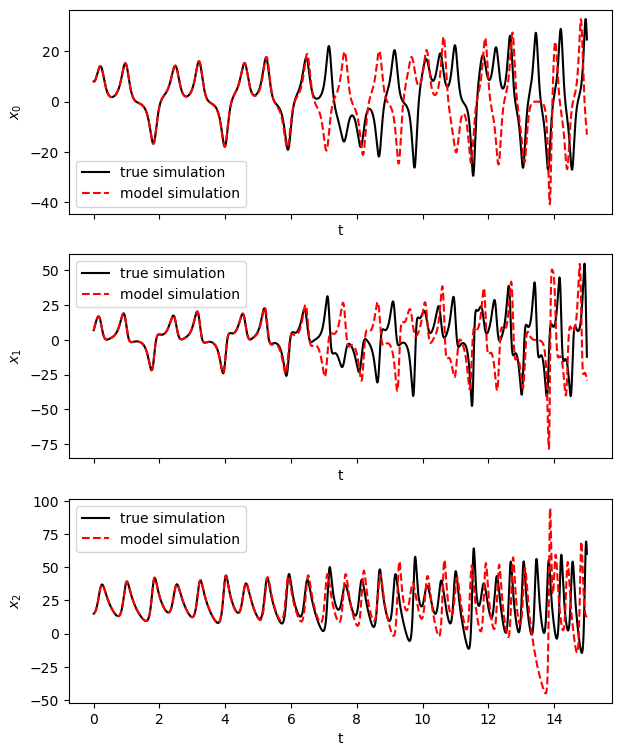

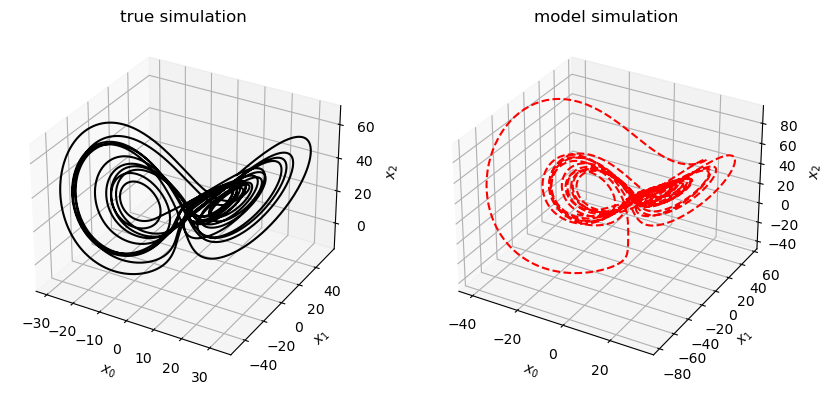

In [46]:
fig, axs = plt.subplots(x_test.shape[1], 1, sharex=True, figsize=(7, 9))
for i in range(x_test.shape[1]):
    axs[i].plot(t_test, x_test[:, i], 'k', label='true simulation')
    axs[i].plot(t_test, x_test_sim[:, i], 'r--', label='model simulation')
    axs[i].legend()
    axs[i].set(xlabel='t', ylabel='$x_{}$'.format(i))

fig = plt.figure(figsize=(10, 4.5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(x_test[:, 0], x_test[:, 1], x_test[:, 2], 'k')
ax1.set(xlabel='$x_0$', ylabel='$x_1$',
        zlabel='$x_2$', title='true simulation')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(x_test_sim[:, 0], x_test_sim[:, 1], x_test_sim[:, 2], 'r--')
ax2.set(xlabel='$x_0$', ylabel='$x_1$',
        zlabel='$x_2$', title='model simulation')

fig.show()